In [34]:
import numpy as np
import scipy as sp
from scipy import optimize
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import Symbol
import math as mt

## Problem 1

In [5]:
#define parameters
R = 5.0
C = 2.0
mu = 10.0
lambd = 8.0
rho = lambd/mu

In [17]:
#define social rate function
def f(n):
    return lambd*R*((1-rho**n)/(1-rho**(n+1)))-(C*((rho/(1-rho))-((n+1)*rho**(n+1))/(1-rho**(n+1))))

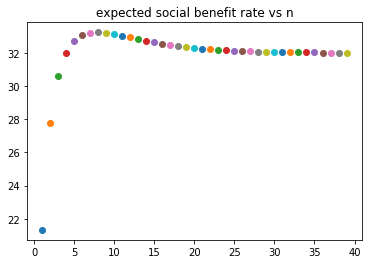

In [29]:
#plot expected social benefit rate vs n

for n in range(1,40,1):
    plt.plot(n, f(n), marker = "o")
plt.title('expected social benefit rate vs n')
plt.show()

In [19]:
#find the exact max value and associated n value, define the benefit
#rate again
def SO(n):
    return lambd*R*((1-rho**n[0])/(1-rho**(n[0]+1)))-C*((rho/(1-rho))-((n[0]+1)*rho**(n[0]+1))/(1-rho**(n[0]+1)))

In [20]:
sp.optimize.fmin(lambda n: -SO(n), np.array([0,0]))

Optimization terminated successfully.
         Current function value: -33.240874
         Iterations: 56
         Function evaluations: 96


array([ 7.86098027, -3.93528052])

### As shown above result, when n* $\approx$ 8, the social benefit rate reaches maximum where the social maximum rate is about 33.24.

In [12]:
#calculate individual optimize system size
n_e = (R * mu)/C
print(n_e)

25.0


### n* = 10 < $n_{e}$ = 25, socially optimal system size is less than the individually optimal system size $n_{e}$.

In [22]:
p = Symbol('p')
solve(((R - p)*mu)/C - 8, p)

[3.40000000000000]

### when p = 3.4, n* = $n_{e}$, the lowest toll is 3.4.

## Problem 2

In [23]:
def z_n(n):
    return lambd*((1-rho**n)/(1-rho**(n+1)))*(R - (C*n)/mu)

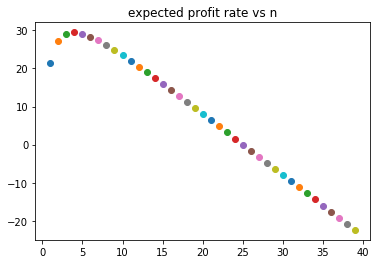

In [31]:
for n in range(1,40,1):
    plt.plot(n, z_n(n), marker = "o")
plt.title('expected profit rate vs n')
plt.show()

In [27]:
#define the profit function again in array form for optimizer
def z_n_a(n):
    return lambd*((1-rho**n[0])/(1-rho**(n[0]+1)))*(R - (C*n[0])/mu)

In [28]:
sp.optimize.fmin(lambda n: -z_n_a(n), np.array([0,0]))

Optimization terminated successfully.
         Current function value: -29.507398
         Iterations: 49
         Function evaluations: 84


array([ 3.93776678, -1.97132956])

### $n_{m}$ $\approx$ 4, $n_{m}$ < n*

## Problem 4

In [145]:
rho4 = 0.95
def p0_cal(c):
    sec_part = 0
    for j in range(0, c, 1):
        sec_part = sec_part + ((c*rho4)**j)/mt.factorial(j)
    return (((c*rho4)**c)/((1-rho4)*mt.factorial(c)) + sec_part)**(-1)

In [154]:
for c in [1, 2, 4, 8, 16, 32]:
    p0 = p0_cal(c)
    d_frac = p0*((c**c)/mt.factorial(c))*((rho4**c)/(1 - rho4))
    d_exp = (1/(1 - rho4*(1/c))) * d_frac
    print('c = ', c, ",", 'fraction delayed = ', d_frac, ', expected delay time = ', d_exp)

c =  1 , fraction delayed =  0.95 , expected delay time =  18.999999999999982
c =  2 , fraction delayed =  0.9256410256410256 , expected delay time =  1.7631257631257629
c =  4 , fraction delayed =  0.8914189951776734 , expected delay time =  1.1690740920362932
c =  8 , fraction delayed =  0.844168630609684 , expected delay time =  0.9579218503372301
c =  16 , fraction delayed =  0.780192462248371 , expected delay time =  0.8294404914268395
c =  32 , fraction delayed =  0.6957101141665399 , expected delay time =  0.7169959308640669
